<a href="https://colab.research.google.com/github/azfar154/LogisticRegressionfromScratch/blob/master/AnotherExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip oranges-vs-grapefruit.zip

Archive:  oranges-vs-grapefruit.zip
replace citrus.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
learning_rate = 0.0001
def sigmoid(x):
  return 1/(1+np.exp(-x))
def calc_loss(pred,actual):
  return -(actual*np.log(pred)+(1-actual)*np.log(1-pred)).mean()
def predict(x,theta):
  return sigmoid(np.matmul(x,theta.T))

In [6]:
data = pd.read_csv('citrus.csv')
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [7]:
data.dtypes

name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object

In [8]:
data.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [9]:
data = data.replace({'orange':1,'grapefruit':0})
data.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [0]:
X = data.drop(columns=['name'])
Y = data['name']

In [11]:
X  

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [0]:
X = X.to_numpy()

In [0]:
bias = np.ones((X.shape[0],1))

In [0]:
X = np.append(bias,X,axis=1)

In [0]:
X_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)

In [16]:
theta = np.zeros((X_train.shape[1],))
losses = []
for i in range(4000):
  h = predict(X_train,theta)
  theta -= learning_rate*(np.matmul(X_train.T,(h-y_train)))/y_train.size
  losses.append(calc_loss(h,y_train))
  if i % 500 == 0:
    print("Loss",calc_loss(h,y_train))

Loss 0.6931471805600337
Loss 0.22090285815485594
Loss 0.20020681171163962
Loss 0.1927553140944887
Loss 0.18899041624491095
Loss 0.1867953509389436
Loss 0.18541414724763078
Loss 0.18450384388005406


In [0]:
num_range = [*range(4000)]

Text(0, 0.5, 'Cost')

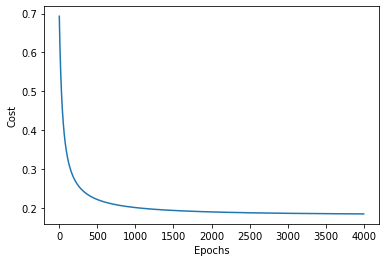

In [18]:
plt.plot(num_range,losses)
plt.xlabel("Epochs")
plt.ylabel("Cost")

In [19]:
pred = (np.matmul(X_train,theta) >= 0) * 1
print("Training Accuracy Score %.2f%%" %(accuracy_score(y_train,pred)*100))

Training Accuracy Score 92.63%


In [20]:
pred = (np.matmul(x_test,theta) >= 0) * 1
print("Testing Accuracy Score %.2f%%" %(accuracy_score(y_test,pred)*100))

Testing Accuracy Score 92.16%


In [21]:
model = LogisticRegression().fit(X_train,y_train)
sci_pred = model.predict(x_test)
model.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9528

In [0]:
scratch_ = confusion_matrix(y_test,pred)
scikit_ = confusion_matrix(y_test,sci_pred)

Model made by scratch


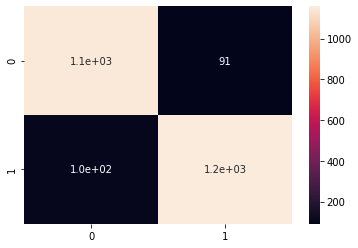

In [23]:
print("Model made by scratch")
sns.heatmap(scratch_,annot=True)

Sci-kit Model


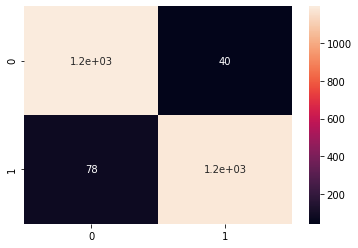

In [24]:
print("Sci-kit Model")
sns.heatmap(scikit_,annot=True)

In [25]:
print("Sci-kit Model")
print(classification_report(y_test,sci_pred))

Sci-kit Model
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1237
           1       0.97      0.94      0.95      1263

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



In [26]:
print("Model made Scratch")
print(classification_report(y_test,pred))

Model made Scratch
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1237
           1       0.93      0.92      0.92      1263

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500

